# PROJECT TITLE 

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [491]:
import pandas as pd 
from IPython.display import Markdown, display
import itertools
import numpy as np
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels
import statsmodels.api as sm
from IPython.display import display, Markdown, Latex
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [492]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [493]:
from IPython.display import display, Markdown, Latex


In [494]:
df = df.drop(columns=['id', 'date', 'waterfront','view', 'grade', 'lat', 'condition','long', 'sqft_basement', 'sqft_lot', 'sqft_above', 'yr_renovated', 'sqft_living15', 'sqft_lot15','yr_built'])
df 

,price,bedrooms,bathrooms,sqft_living,floors,zipcode
0,221900.0,3,1.00,1180,1.0,98178
1,538000.0,3,2.25,2570,2.0,98125
2,180000.0,2,1.00,770,1.0,98028
3,604000.0,4,3.00,1960,1.0,98136
4,510000.0,3,2.00,1680,1.0,98074
...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,98103
21593,400000.0,4,2.50,2310,2.0,98146
21594,402101.0,2,0.75,1020,2.0,98144
21595,400000.0,3,2.50,1600,2.0,98027


## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   floors       21597 non-null  float64
 5   zipcode      21597 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1012.5 KB


In [496]:
df.drop(columns='price')

,bedrooms,bathrooms,sqft_living,floors,zipcode
0,3,1.00,1180,1.0,98178
1,3,2.25,2570,2.0,98125
2,2,1.00,770,1.0,98028
3,4,3.00,1960,1.0,98136
4,3,2.00,1680,1.0,98074
...,...,...,...,...,...
21592,3,2.50,1530,3.0,98103
21593,4,2.50,2310,2.0,98146
21594,2,0.75,1020,2.0,98144
21595,3,2.50,1600,2.0,98027


In [497]:
df = df.dropna()

In [498]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,zipcode
0,221900.0,3,1.00,1180,1.0,98178
1,538000.0,3,2.25,2570,2.0,98125
2,180000.0,2,1.00,770,1.0,98028
3,604000.0,4,3.00,1960,1.0,98136
4,510000.0,3,2.00,1680,1.0,98074


We learned the astype(float) approach below from https://stackoverflow.com/questions/56632463/why-we-have-to-convert-data-types-into-float-before-running-the-statsmodel-for-s



In [499]:
df['bedrooms']

0        3
1        3
2        2
3        4
4        3
        ..
21592    3
21593    4
21594    2
21595    3
21596    2
Name: bedrooms, Length: 21597, dtype: int64

In [500]:
df = df.loc[df['bedrooms']<=4]
df

,price,bedrooms,bathrooms,sqft_living,floors,zipcode
0,221900.0,3,1.00,1180,1.0,98178
1,538000.0,3,2.25,2570,2.0,98125
2,180000.0,2,1.00,770,1.0,98028
3,604000.0,4,3.00,1960,1.0,98136
4,510000.0,3,2.00,1680,1.0,98074
...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,3.0,98103
21593,400000.0,4,2.50,2310,2.0,98146
21594,402101.0,2,0.75,1020,2.0,98144
21595,400000.0,3,2.50,1600,2.0,98027


In [501]:
df['bedrooms'].describe()

count    19662.000000
mean         3.189706
std          0.703063
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: bedrooms, dtype: float64

In [502]:
X = df.drop(columns='price')
y = df['price']

In [503]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [504]:
ss = StandardScaler() 
X_scaled = ss.fit_transform(X_train)
results = sm.OLS(y_train, sm.add_constant(X_train)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     2798.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:43:44   Log-Likelihood:            -2.0284e+05
No. Observations:               14746   AIC:                         4.057e+05
Df Residuals:                   14740   BIC:                         4.057e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -6.02e+07   3.55e+06    -16.953      0.000   -6.72e+07   -5.32e+07
bedrooms     -6.26e+04   3297.360    -18.983      0.000   -6.91e+04   -5.61e+04
bathrooms    1.281e+04   4270.926      3.000      0.003    4443.004    2.12e+04
sqft_living   292.6453      3.539     82.701      0.000     285.709     299.581
floors       2242.3303   4087.236      0.549      0.583   -5769.162    1.03e+04
zipcode       614.8761     36.189     16.991      0.000     543.942     685.810
==============================================================================
Omnibus:                     7940.908   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123729.534
Skew:                           2.239   Prob(JB):                         0.00
Kurtosis:                      16.465   Cond. No.                     1.86e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [505]:
tv_model = sm.OLS(y.astype(float), X.astype(float)).fit()
tv_model_summ = tv_model.summary()

In [506]:
tv_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.856
Model:                            OLS   Adj. R-squared (uncentered):              0.856
Method:                 Least Squares   F-statistic:                          2.329e+04
Date:                Tue, 28 Jun 2022   Prob (F-statistic):                        0.00
Time:                        15:43:44   Log-Likelihood:                     -2.7065e+05
No. Observations:               19662   AIC:                                  5.413e+05
Df Residuals:                   19657   BIC:                                  5.414e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -7.103e+04   2858.811    -24.845      0.000   -7.66e+04   -6.54e+04
bathrooms    7447.9848   3723.227      2.000      0.045     150.145    1.47e+04
sqft_living   290.5152      3.083     94.231      0.000     284.472     296.558
floors       4219.6245   3559.717      1.185      0.236   -2757.723    1.12e+04
zipcode         1.4784      0.085     17.439      0.000       1.312       1.645
==============================================================================
Omnibus:                    10452.226   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           155754.855
Skew:                           2.218   Prob(JB):                         0.00
Kurtosis:                      16.055   Cond. No.                     2.61e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

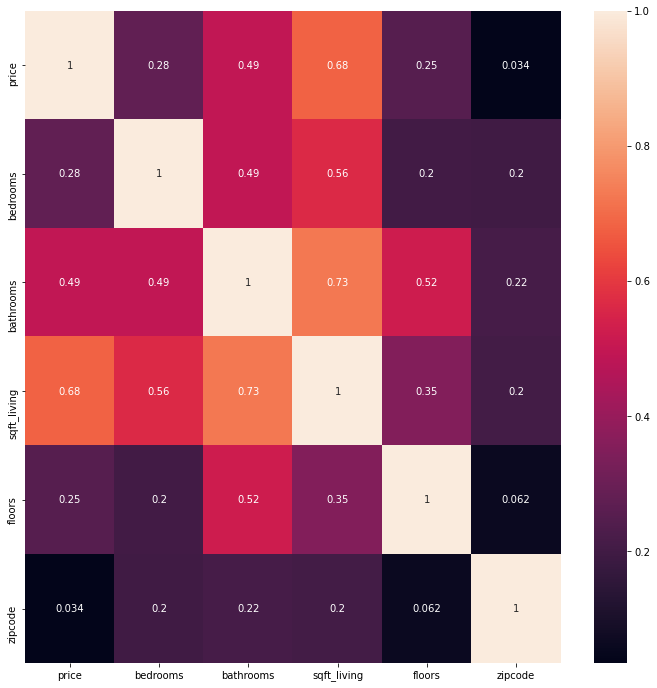

In [508]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr().abs(), annot=True)
plt.show()

In [509]:
from sklearn.model_selection import train_test_split

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?